# <center> Interpolación de Lagrange <center>
https://github.com/jerck1/prueba

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image

## Problema de aplicación:
Supongamos que tenemos una tabla termodinámica con los datos experimentales de temperatura y energía interna específica específica. Se requiere saber la temperatura en un punto intermedio, por ejemplo, para 298 K, que es la temperatura ambiente. Para resolver este problema, podemos usar un método de interpolación, como el de Lagrange.

In [69]:
# Temperatura=np.arange(220,330,10) # K
Temperatura=np.arange(0,55,5) # K
# Energia=[4575,4782,4989,5197,5405,5613,5822,
#          6032,6242,6453,6664] #kJ/mol
Energia=[0,21.019,42.02,62.98,83.913,104.83,
         125.73,146.63,167.53,188.43,209.33]
data=pd.DataFrame({"Temperatura (K)": Temperatura, "u (KJ/kmol)": Energia})
data

,Temperatura (K),u (KJ/kmol)
0,0,0.000
1,5,21.019
2,10,42.020
3,15,62.980
4,20,83.913
5,25,104.830
6,30,125.730
7,35,146.630
8,40,167.530
9,45,188.430


## Formula para los coeficientes de interpolación
Dados n puntos de la forma $(x_0,y_0),(x_1,y_1),...,(x_{n-1},y_{n-1})$, el polinomio de Lagrange que interpola los puntos está dado por la superposición:
$$ p(x)=\sum_{i=0}^{n-1}y_{i}L_{i}(x)$$ 
Con x: Punto a interpolar ; $y_{i}$ coordenada en y i-ésima $L_{i}$ producto $i$-ésimo dado por la siguiente expresión:
    $$ L_{i}(x)=\Pi_{j=0,j\neq i}^{n}\frac{(x-x_{j})}{(x_{i}-x_{j})} $$ $ i=0,...,n-1$

In [70]:
#Implementamos el cálculo de la base del polinomio L_i en un función:
def L(i,x,X,n):#i=0, j=1,2
    prod=1
    for j in range(n):
        if(i!=j):
            prod*=(x-X[j])/(X[i]-X[j])
    return prod
##################################################################################
#Calculamos los polinomios haciendo una sumatoria de los productos L_iy_i
def p_lagrange(x,X,Y):
    n=len(X)
    suma=0
    for i in range(n):
#         print(type(L(i,x,X,n)))
#         print(type(Y[i]))
        suma+=L(i,x,X,n)*Y[i]
    return suma

In [75]:
T_int1=16
u_1=p_lagrange(T_int1,data["Temperatura (K)"],data["u (KJ/kmol)"])
u_1

67.16787239559166

Ahora hagamos la interpolación para un punto más cercano a los bordes, por ejemplo 315 K:

In [78]:
T_int2=41
u_2=p_lagrange(T_int2,data["Temperatura (K)"],data["u (KJ/kmol)"])
u_2

171.70870430343163

Gráfiquemos los dos puntos

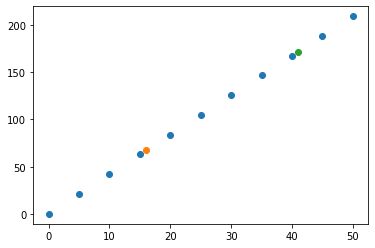

In [77]:
plt.scatter(data["Temperatura (K)"],data["u (KJ/kmol)"])
plt.scatter(T_int1,u_1)
plt.scatter(T_int2,u_2)

Para una colección de puntos interpolados:

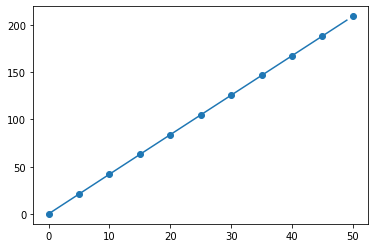

In [84]:
T_range=np.arange(0,50,1)
puntos=[p_lagrange(x,data["Temperatura (K)"],data["u (KJ/kmol)"]) for x in T_range]
plt.scatter(data["Temperatura (K)"],data["u (KJ/kmol)"])
plt.plot(T_range,puntos)

* Si los datos no fueran lineales, a medida que aumentemos la cantidad de puntos, la interpolación fallaría, especialmente en los bordes. Para esto, se pueden utilizar otros mètodos de interpolación, como el método de Newton.